In [3]:
# pip install pandas matplotlib


In [4]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('/Users/amulya/Desktop/Capstone/DSCI-601-Amy/ProjectCode/Data Pipelines/Cleaned_AAPL.csv', parse_dates=['date'])

In [6]:
df = df.sort_values('date')

In [7]:
df

,date,RET,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,DJI_Return
0,1992-01-02,0.055432,0.717745,0.008403,4.510000e-10,0.000408,17.419850,0.000000
1,1992-01-03,-0.008403,-0.172890,0.004237,-8.340000e-11,0.004985,14.408127,0.009173
2,1992-01-06,-0.016949,-0.399632,0.004310,-2.850000e-10,-0.003291,8.650181,-0.000437
3,1992-01-07,0.019397,0.237283,0.004228,2.590000e-10,-0.001340,10.702726,0.001469
4,1992-01-08,0.023256,0.645321,0.004132,1.840000e-10,0.001677,17.609419,-0.000281
...,...,...,...,...,...,...,...,...
7801,2022-12-23,-0.002798,-0.181476,0.000076,-3.330000e-13,0.005868,4.008909,0.005342
7802,2022-12-27,-0.013878,0.081093,0.000231,-1.550000e-12,-0.004050,4.334004,0.001133
7803,2022-12-28,-0.030685,0.238299,0.000079,-2.850000e-12,-0.012021,5.366792,-0.011006
7804,2022-12-29,0.028324,-0.115337,0.000231,2.890000e-12,0.017461,4.747802,0.010497


In [8]:
short_window = 50
long_window = 200

# Calculate the moving averages
df['Short_MA'] = df['RET'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['RET'].rolling(window=long_window, min_periods=1).mean()


In [9]:
# Calculate the 2-day SMA for the 'RET' column
#df['SMA_RET'] = df['RET'].rolling(window=50).mean()

In [10]:
df

,date,RET,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,DJI_Return,Short_MA,Long_MA
0,1992-01-02,0.055432,0.717745,0.008403,4.510000e-10,0.000408,17.419850,0.000000,0.055432,0.055432
1,1992-01-03,-0.008403,-0.172890,0.004237,-8.340000e-11,0.004985,14.408127,0.009173,0.023515,0.023515
2,1992-01-06,-0.016949,-0.399632,0.004310,-2.850000e-10,-0.003291,8.650181,-0.000437,0.010027,0.010027
3,1992-01-07,0.019397,0.237283,0.004228,2.590000e-10,-0.001340,10.702726,0.001469,0.012369,0.012369
4,1992-01-08,0.023256,0.645321,0.004132,1.840000e-10,0.001677,17.609419,-0.000281,0.014547,0.014547
...,...,...,...,...,...,...,...,...,...,...
7801,2022-12-23,-0.002798,-0.181476,0.000076,-3.330000e-13,0.005868,4.008909,0.005342,-0.001253,-0.000629
7802,2022-12-27,-0.013878,0.081093,0.000231,-1.550000e-12,-0.004050,4.334004,0.001133,-0.000886,-0.000579
7803,2022-12-28,-0.030685,0.238299,0.000079,-2.850000e-12,-0.012021,5.366792,-0.011006,-0.002082,-0.000600
7804,2022-12-29,0.028324,-0.115337,0.000231,2.890000e-12,0.017461,4.747802,0.010497,-0.001703,-0.000606


- Need to backtest strategy to see how well it performs


In [11]:
# Generate signals
df['Signal'] = 0
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)  # Buy signal
df['Position'] = df['Signal'].diff()  # Capture when the position changes (buy/sell)

/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_33368/3812503576.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)  # Buy

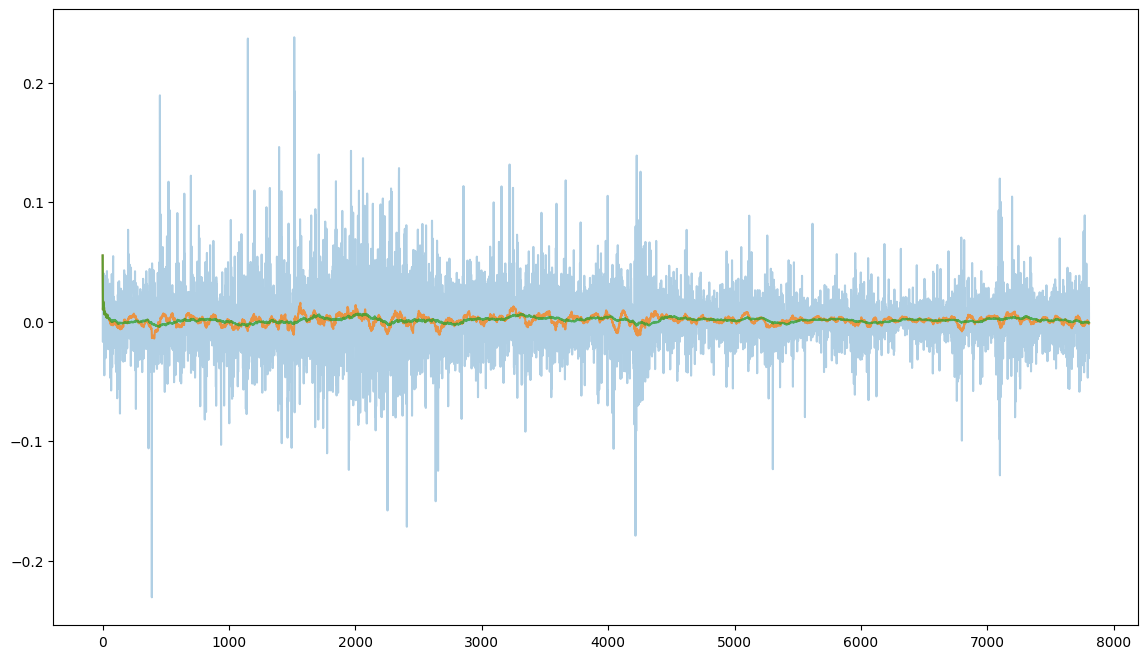

In [12]:
plt.figure(figsize=(14, 8))
plt.plot(df['RET'], label='Asset Returns', alpha=0.35)
plt.plot(df['Short_MA'], label='50-day Moving Average', alpha=0.75)
plt.plot(df['Long_MA'], label='200-day Moving Average', alpha=0.75)


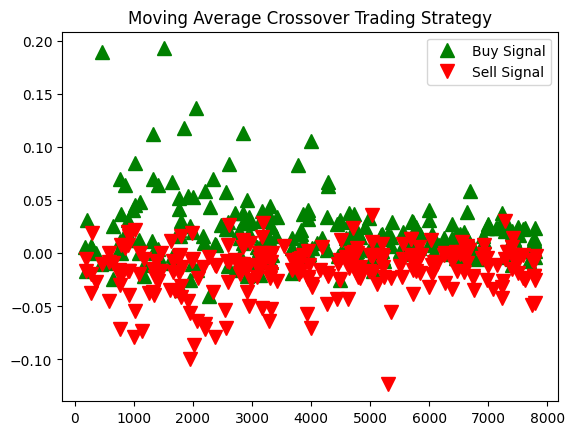

In [13]:

plt.plot(df[df['Position'] == 1].index, df['RET'][df['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

plt.plot(df[df['Position'] == -1].index, df['RET'][df['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Moving Average Crossover Trading Strategy')

plt.legend(loc='best')
plt.show()

## Using Vol_Change

In [14]:
# Define a threshold for volume change
volume_change_threshold = 0.05  # 5% volume change

In [15]:
# Buy signal: Short MA > Long MA and VOL_CHANGE is significantly positive
df['Signal'] = 0
df['Signal'][(df['Short_MA'] > df['Long_MA']) & (df['VOL_CHANGE'] > volume_change_threshold)] = 1

# Sell signal: Short MA < Long MA and VOL_CHANGE is significantly negative
df['Signal'][(df['Short_MA'] < df['Long_MA']) & (df['VOL_CHANGE'] < -volume_change_threshold)] = -1

# Position change logic (buy/sell)
df['Position'] = df['Signal'].diff()


/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_33368/3971631708.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][(df['Short_MA'] > df['Long_MA']) & (df['VOL_CHANGE'] > volume_change_threshold)] = 1
/var/folders/69

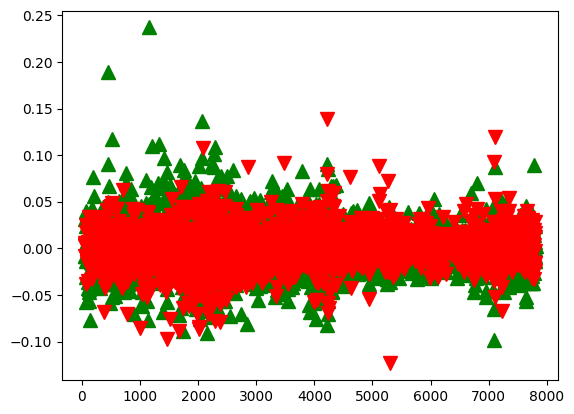

In [16]:
# Plot buy signals (based on new conditions)
plt.plot(df[df['Position'] == 1].index, df['RET'][df['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
# Plot sell signals (based on new conditions)
plt.plot(df[df['Position'] == -1].index, df['RET'][df['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')


In [17]:
#pip install scikit-optimize


### Backtest strategy - MA

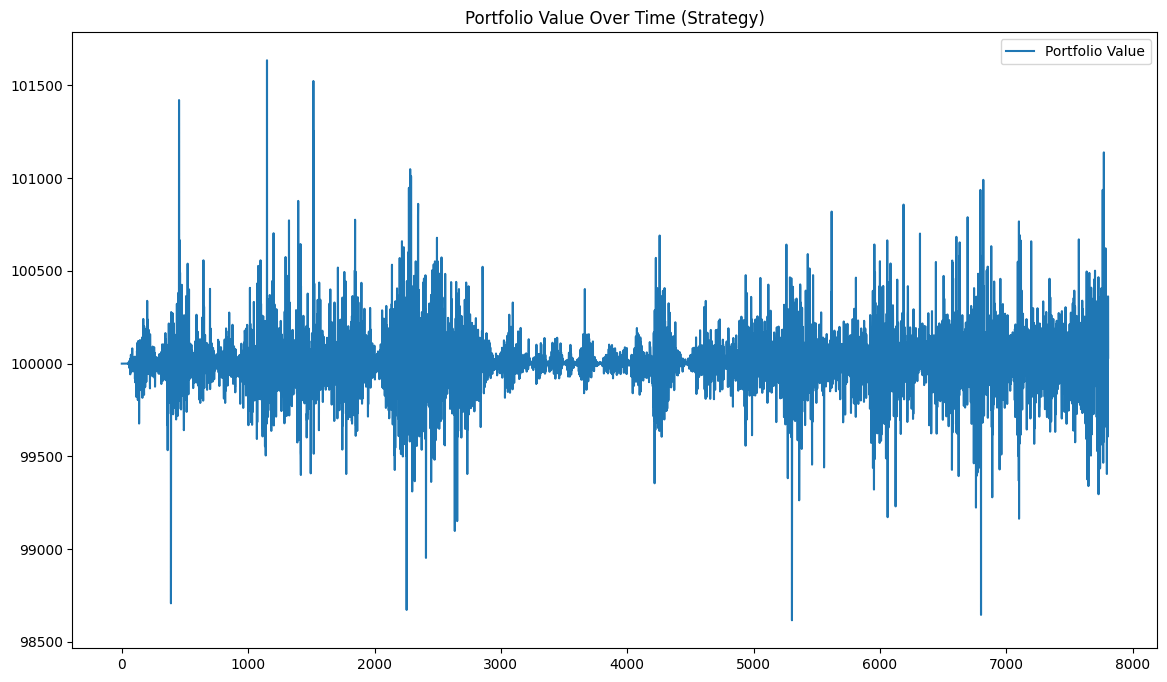

In [18]:

initial_capital = 100000.0
df['Portfolio'] = initial_capital  

# investor holds 100 shares when a buy signal 
shares = 100

# Calc value of portfolio over time based on signals
df['Holdings'] = df['Signal'] * shares * df['RET']  # Holdings in the asset
df['Cash'] = initial_capital - (df['Signal'].cumsum() * shares * df['RET'])  # Cash position after buying/selling

# Portfolio value = Cash + Holdings
df['Portfolio'] = df['Cash'] + df['Holdings']

# portf over time
plt.figure(figsize=(14, 8))
plt.plot(df['Portfolio'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Strategy)')
plt.legend(loc='best')
plt.show()



Total Return shows how much profit the strategy made as a percentage of the initial capital.

Max Drawdown shows the worst-case scenario of how much the portfolio could have lost from its highest point.

Sharpe Ratio evaluates how much return you earned for the risk you took, with a higher ratio indicating a better risk-adjusted return.

In [20]:
### Performance Metrics ###


df['Daily_Return'] = df['Portfolio'].pct_change()

# 1. Total Return
total_return = (df['Portfolio'].iloc[-1] - initial_capital) / initial_capital * 100
print(f"Total Return: {total_return:.2f}%")

# 2. Max Drawdown
df['Peak'] = df['Portfolio'].cummax()  # cumulative maximum portfolio value
df['Drawdown'] = (df['Portfolio'] - df['Peak']) / df['Peak'] 
max_drawdown = df['Drawdown'].min()  # Max drawdown is the minimum drawdown (most negative)
print(f"Max Drawdown: {max_drawdown:.2%}")

# 3. Sharpe Ratio
risk_free_rate = 0  # risk-free rate is 0 for simplicity
average_daily_return = df['Daily_Return'].mean()
std_dev_daily_return = df['Daily_Return'].std()

# Annualized Sharpe ratio (252 trading days)
sharpe_ratio = (average_daily_return - risk_free_rate) / std_dev_daily_return * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Total Return: 0.03%
Max Drawdown: -2.97%
Sharpe Ratio: 0.02
